<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
glove_vectors='/content/glove_vectors'

In [ ]:
import pickle
#please use below code to load glove vectors
with open(glove_vectors, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:

Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_`
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path="/content/train_data.csv"
resource_path="/content/resources.csv"

In [ ]:
import pandas
project_data = pd.read_csv(train_path,nrows=50000)
resource_data=pd.read_csv(resource_path)

In [ ]:
# write code in following steps for task 1
# 1. calculate sentiment scores for the essay feature
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


Preprocessing categorical and numerical data

In [ ]:
project_data['project_grade_category'].value_counts()

,count
project_grade_category,
Grades PreK-2,20316
Grades 3-5,16968
Grades 6-8,7750
Grades 9-12,4966


In [ ]:
#Preprocessing project grade category
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

,count
project_grade_category,
grades_prek_2,20316
grades_3_5,16968
grades_6_8,7750
grades_9_12,4966


In [ ]:
project_data['project_subject_categories'].value_counts()

,count
project_subject_categories,
Literacy & Language,10927
Math & Science,7695
"Literacy & Language, Math & Science",6705
Health & Sports,4700
Music & The Arts,2358
Special Needs,1913
"Literacy & Language, Special Needs",1814
Applied Learning,1719
"Math & Science, Literacy & Language",1041


In [ ]:
#Preprocessing project_subject_categories
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

,count
project_subject_categories,
literacy_language,10927
math_science,7695
literacy_language_math_science,6705
health_sports,4700
music_arts,2358
specialneeds,1913
literacy_language_specialneeds,1814
appliedlearning,1719
math_science_literacy_language,1041


In [ ]:
project_data['teacher_prefix'].value_counts()

,count
teacher_prefix,
Mrs.,26140
Ms.,17936
Mr.,4859
Teacher,1061
Dr.,2


In [ ]:
#Preprocessing teacher_prefix
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 2


In [ ]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
project_data['teacher_prefix'].value_counts()

,count
teacher_prefix,
Mrs.,26142
Ms.,17936
Mr.,4859
Teacher,1061
Dr.,2


In [ ]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

,count
teacher_prefix,
mrs,26142
ms,17936
mr,4859
teacher,1061
dr,2


In [ ]:
project_data['project_subject_subcategories'].value_counts()

,count
project_subject_subcategories,
Literacy,4434
"Literacy, Mathematics",3833
"Literature & Writing, Mathematics",2705
"Literacy, Literature & Writing",2570
Mathematics,2441
...,...
"Applied Sciences, Economics",1
"Civics & Government, ESL",1
"Environmental Science, Team Sports",1


In [ ]:
#Preprocessing project_subject_subcategories
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

,count
project_subject_subcategories,
literacy,4434
literacy_mathematics,3833
literature_writing_mathematics,2705
literacy_literature_writing,2570
mathematics,2441
...,...
appliedsciences_economics,1
civics_government_esl,1
environmentalscience_teamsports,1


In [ ]:
project_data['school_state'].value_counts()

,count
school_state,
CA,7024
NY,3393
TX,3320
FL,2839
NC,2340
IL,1967
SC,1830
GA,1828
MI,1468


In [ ]:
#preprocessing school_state
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

,count
school_state,
ca,7024
ny,3393
tx,3320
fl,2839
nc,2340
il,1967
sc,1830
ga,1828
mi,1468


In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
project_data['project_title'].head(5)

,project_title
0,Educational Support for English Learners at Home
1,Wanted: Projector for Hungry Learners
2,Soccer Equipment for AWESOME Middle School Stu...
3,Techie Kindergarteners
4,Interactive Math Tools


In [ ]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [ ]:
# Combining all the above stundents
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
#preprocessing project_title
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 50000/50000 [00:00<00:00, 57822.69it/s]


In [ ]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


In [ ]:
# merge two column text dataframe:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['essay'].values)):
    project_data['essay'].values[i] = project_data['essay'].values[i].lower()

In [ ]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:22<00:00, 2203.30it/s]


In [ ]:
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [ ]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['project_title'].values)):
    project_data['project_title'].values[i] = project_data['project_title'].values[i].lower()

In [ ]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('nan',' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:00<00:00, 55710.27it/s]


In [ ]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
neg=[]
pos=[]
neu=[]
compound=[]
for_sentiment = project_data['essay'].tolist()
for i in for_sentiment:
    j=sid.polarity_scores(i)['neg']
    k=sid.polarity_scores(i)['pos']
    l=sid.polarity_scores(i)['neu']
    m=sid.polarity_scores(i)['compound']
    neg.append(j)
    pos.append(k)
    neu.append(l)
    compound.append(m)
project_data['neg']=neg
project_data['pos']=pos
project_data['neu']=neu
project_data['compound']=compound

In [ ]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,essay,preprocessed_essays,preprocessed_titles,neg,pos,neu,compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,literacy_language,esl_literacy,educational support for english learners at home,My students need opportunities to practice beg...,0,my students are english learners that are work...,students english learners working english seco...,educational support english learners home,0.008,0.081,0.911,0.9611


1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print("Split ratio")
print('-'*50)
print('Train dataset:',len(X_train)/len(X)*100,'%\n','size:',len(X_train))
print('Test dataset:',len(X_test)/len(X)*100,'%\n','size:',len(X_test))

Split ratio
--------------------------------------------------
Train dataset: 67.0 %
 size: 33500
Test dataset: 33.0 %
 size: 16500


1.3 Make Data Model Ready: encoding eassay

TFIDF

In [ ]:
#Converting essay in to TFIDF representation using count vectorizer.
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'])      #Fitting has to be on Train data

X_train_essay_tfidf = vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'].values)

X_test_essay_tfidf = vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'].values)

print("Shape of train data matrix after one hot encoding ",X_train_essay_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",X_test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (33500, 10331)
Shape of test data matrix after one hot encoding  (16500, 10331)


TFIDF WEIGHTED W2V

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names_out(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names_out())

In [ ]:
# converting essay to tfidf_w2v
# compute average word2vec for each review.
def tfidf_w2v(words):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(words): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [ ]:
train_tfidf_w2v=tfidf_w2v(X_train['preprocessed_essays'])
test_tfidf_w2v=tfidf_w2v(X_test['preprocessed_essays'])

100%|██████████| 33500/33500 [00:52<00:00, 639.31it/s]


33500
300


100%|██████████| 16500/16500 [00:25<00:00, 650.56it/s]

16500
300


1.4 Make Data Model Ready: encoding numerical, categorical features

In [ ]:
#one hot encoding school_state
vectorizer1 = CountVectorizer(binary=True)
vectorizer1.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer1.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer1.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names_out())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [ ]:
#one hot encoding teacher_prefix
vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer2.transform(X_train['teacher_prefix'].values)

X_test_teacher_ohe = vectorizer2.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)

print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names_out())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr' 'mr' 'mrs' 'ms' 'teacher']


In [ ]:
#One hot coding project_grade_category
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer3.transform(X_train['project_grade_category'].values)

X_test_grade_ohe = vectorizer3.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)

print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names_out())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


In [ ]:
#One hot encoding project_subject_categories
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subject_ohe = vectorizer4.transform(X_train['project_subject_categories'].values)

X_test_subject_ohe = vectorizer4.transform(X_test['project_subject_categories'].values)

print("After vectorizations")
print(X_train_subject_ohe.shape, y_train.shape)

print(X_test_subject_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names_out())
print("="*100)

After vectorizations
(33500, 49) (33500,)
(16500, 49) (16500,)
['appliedlearning' 'appliedlearning_health_sports'
 'appliedlearning_history_civics' 'appliedlearning_literacy_language'
 'appliedlearning_math_science' 'appliedlearning_music_arts'
 'appliedlearning_specialneeds' 'appliedlearning_warmth_care_hunger'
 'health_sports' 'health_sports_appliedlearning'
 'health_sports_history_civics' 'health_sports_literacy_language'
 'health_sports_math_science' 'health_sports_music_arts'
 'health_sports_specialneeds' 'health_sports_warmth_care_hunger'
 'history_civics' 'history_civics_appliedlearning'
 'history_civics_health_sports' 'history_civics_literacy_language'
 'history_civics_math_science' 'history_civics_music_arts'
 'history_civics_specialneeds' 'literacy_language'
 'literacy_language_appliedlearning' 'literacy_language_health_sports'
 'literacy_language_history_civics' 'literacy_language_math_science'
 'literacy_language_music_arts' 'literacy_language_specialneeds'
 'literacy_langu

In [ ]:
#One hot encoding project_subject_subcategories
vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subject_sub_ohe = vectorizer5.transform(X_train['project_subject_subcategories'].values)

X_test_subject_sub_ohe = vectorizer5.transform(X_test['project_subject_subcategories'].values)

print("After vectorizations")
print(X_train_subject_sub_ohe.shape, y_train.shape)

print(X_test_subject_sub_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names_out())
print("="*100)

After vectorizations
(33500, 367) (33500,)
(16500, 367) (16500,)
['appliedsciences' 'appliedsciences_charactereducation'
 'appliedsciences_civics_government' 'appliedsciences_college_careerprep'
 'appliedsciences_communityservice' 'appliedsciences_earlydevelopment'
 'appliedsciences_economics' 'appliedsciences_environmentalscience'
 'appliedsciences_esl' 'appliedsciences_extracurricular'
 'appliedsciences_financialliteracy' 'appliedsciences_foreignlanguages'
 'appliedsciences_gym_fitness' 'appliedsciences_health_lifescience'
 'appliedsciences_health_wellness' 'appliedsciences_history_geography'
 'appliedsciences_literacy' 'appliedsciences_literature_writing'
 'appliedsciences_mathematics' 'appliedsciences_music'
 'appliedsciences_nutritioneducation' 'appliedsciences_other'
 'appliedsciences_parentinvolvement' 'appliedsciences_performingarts'
 'appliedsciences_socialsciences' 'appliedsciences_specialneeds'
 'appliedsciences_teamsports' 'appliedsciences_visualarts'
 'charactereducation' 

In [ ]:
#Normalizing price
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [ ]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [ ]:
#Normalizing teacher_number_of_previously_posted_projects
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_post_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_post_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_post_norm.shape, y_train.shape)

print(X_test_post_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['neg'].values) from sentimental analysis
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1)) #from sentimental analysis

X_train_pos_norm = normalizer.transform(X_train['pos'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)

print(X_test_pos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['neu'].values)#from sentimental analysis
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_com_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))

X_test_com_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_com_norm.shape, y_train.shape)

print(X_test_com_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


# **SET**-1

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_subject_ohe,X_train_subject_sub_ohe,X_train_price_norm,X_train_post_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm,X_train_com_norm)).tocsr()

X_te1 = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_subject_ohe,X_test_subject_sub_ohe, X_test_price_norm,X_test_post_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm,X_test_com_norm)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)

print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 10813) (33500,)
(16500, 10813) (16500,)


In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

    return y_data_pred

Perfoming grid search for hyper parameter tuning

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

DT = DecisionTreeClassifier(class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100,500]}
clf = GridSearchCV(DT, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(X_tr1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestMaxDepth_1=clf.best_params_['max_depth']
bestMinSampleSplit_1=clf.best_params_['min_samples_split']
bestScore_1=clf.best_score_
print("BEST MAX DEPTH: ",clf.best_params_['max_depth']," BEST SCORE: ",clf.best_score_,"BEST MIN SAMPLE SPLIT: ",clf.best_params_['min_samples_split'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
BEST MAX DEPTH:  10  BEST SCORE:  0.618152753842518 BEST MIN SAMPLE SPLIT:  500


In [ ]:
clf.cv_results_

{'mean_fit_time': array([ 0.47823461,  0.47951969,  0.48642826,  0.48786585,  2.26898972,
         2.2738905 ,  2.22398249,  2.16960828,  5.24728195,  5.20109733,
         4.82065749,  4.2919879 , 23.03221742, 22.71821745, 17.65500315,
        11.76247772]),
 'std_fit_time': array([0.00191103, 0.0003801 , 0.00409596, 0.00516602, 0.01664337,
        0.02226297, 0.01818494, 0.01355456, 0.07755927, 0.09715751,
        0.08618533, 0.10218484, 0.19218095, 0.33177411, 0.31744991,
        0.21132603]),
 'mean_score_time': array([0.01094731, 0.01079408, 0.01100135, 0.01092815, 0.01142605,
        0.01145593, 0.01143583, 0.01159151, 0.01183136, 0.01191688,
        0.0117166 , 0.01169395, 0.01315379, 0.01321991, 0.01326235,
        0.01277749]),
 'std_score_time': array([7.65065701e-05, 2.82532443e-05, 1.56400771e-04, 1.64710258e-05,
        3.24321331e-05, 5.90207856e-05, 2.24150098e-05, 2.43914701e-04,
        9.56016552e-05, 1.78775571e-04, 8.78114324e-05, 5.41089376e-05,
        5.59876003e-

In [ ]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)


In [ ]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

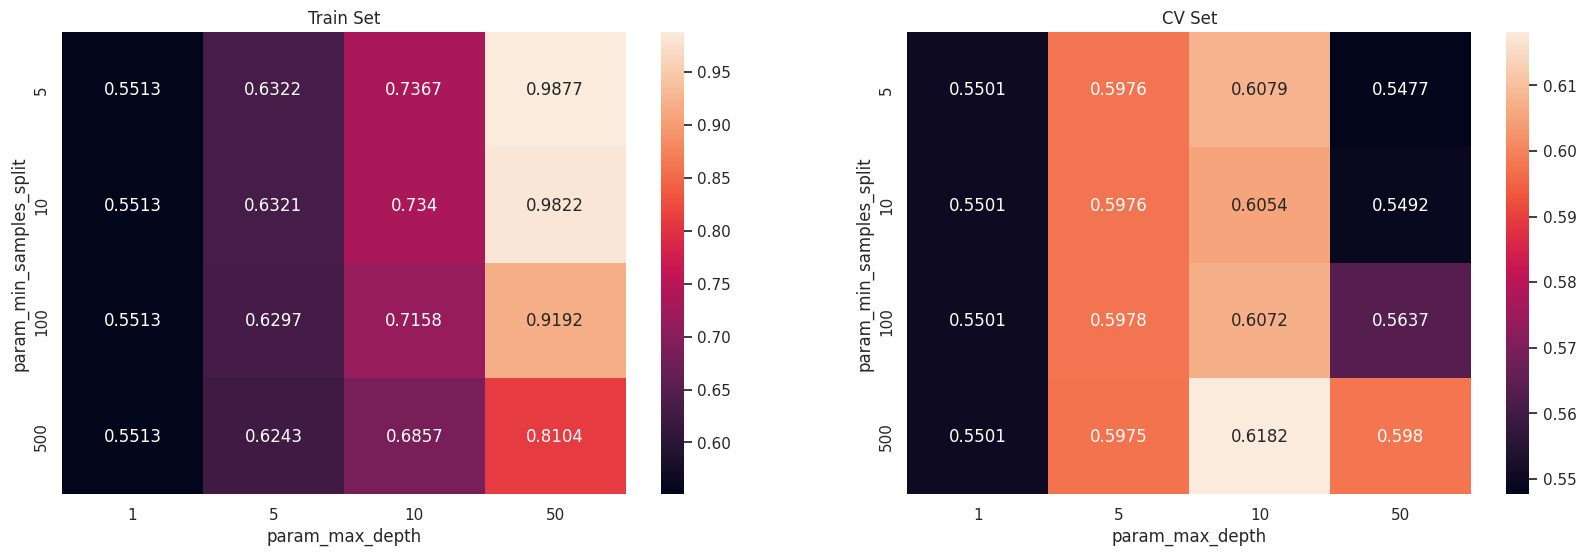

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Added import statement

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

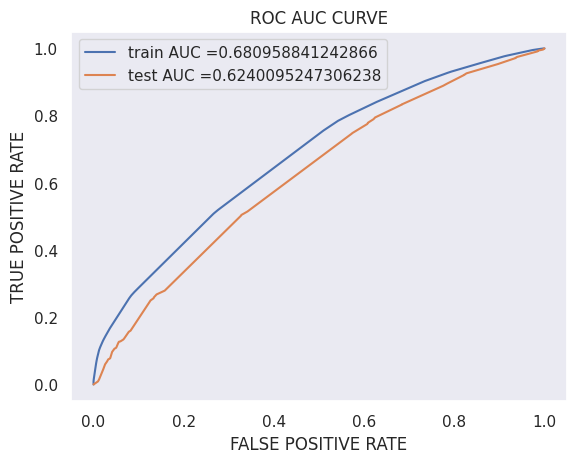

In [ ]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

clf=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf.fit(X_tr1, y_train)
# for visulation
clf.fit(X_tr1, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf.predict_proba(X_tr1) [:,1]
y_test_pred1 = clf.predict_proba(X_te1) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC AUC CURVE")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions1
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t)))

the maximum value of tpr*(1-fpr) 0.37601680936870163 for threshold 0.528
Train confusion matrix
[[ 3741  1427]
 [13615 14717]]
Test confusion matrix
[[1677  869]
 [6772 7182]]


the maximum value of tpr*(1-fpr) 0.37601680936870163 for threshold 0.528


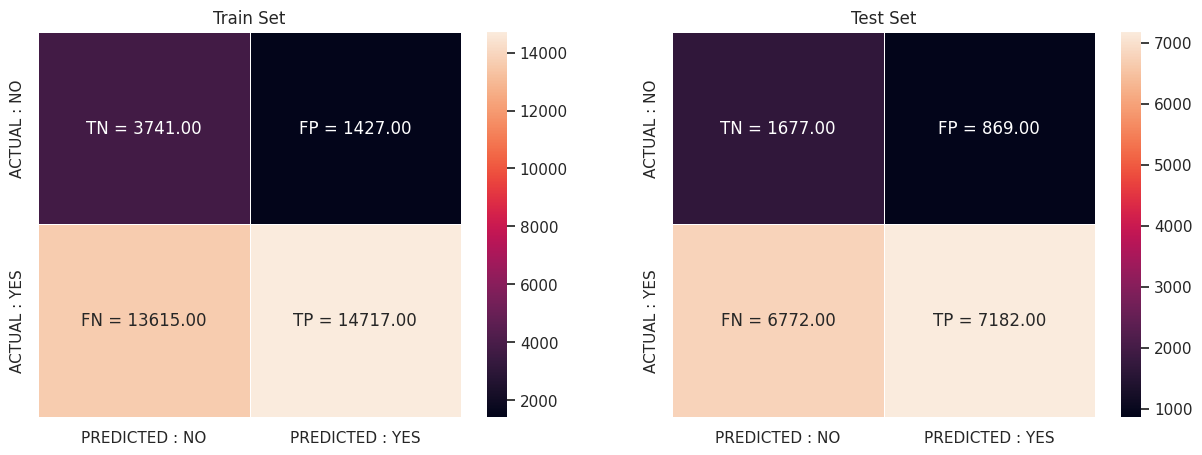

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
con_m_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t))
con_m_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these false positive data points

In [ ]:
false_positives = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
    false_positives.append(i)
fp_essay1 = []
for i in false_positives :
  fp_essay1.append(X_test['essay'].values[i])

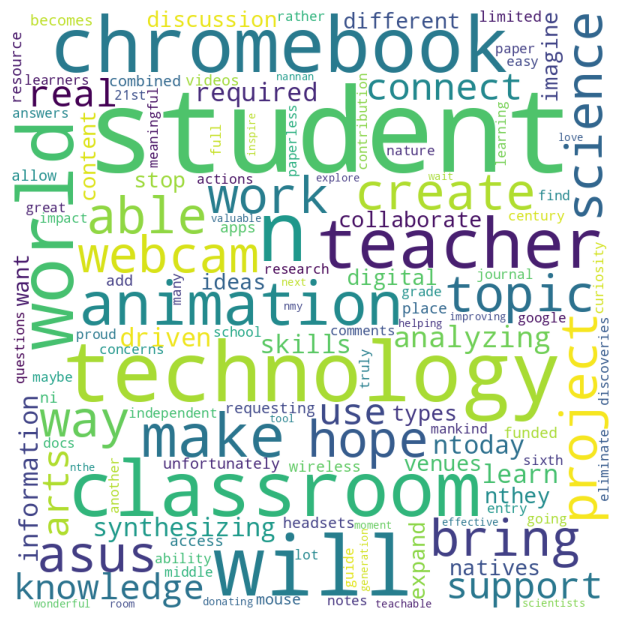

In [ ]:
  fp_essay1.append(X_test['essay'].values[i])
#COPIED FROM:https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)

for val in fp_essay1:
    val = str(val)
    tokens = val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)


plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Creating Dataframe with falsepositive points

In [ ]:
cols = X_test.columns
X_test_falsePositives = pd.DataFrame(columns=cols)

In [ ]:
# Create a list to store the false positive DataFrames
fp_data_frames = []
for i in false_positives:
  # Filter the row from X_test and add it to the list
  fp_data_frames.append(X_test.loc[[i]]) # Using .loc to get a DataFrame row by index

# Concatenate all collected DataFrames at once
# Check if the list is not empty to avoid errors with pd.concat on an empty list
if fp_data_frames:
    X_test_falsePositives = pd.concat(fp_data_frames)
else:
    # If no false positives, X_test_falsePositives remains an empty DataFrame as initialized
    # (X_test_falsePositives = pd.DataFrame(columns=cols) from previous cell)
    pass

In [ ]:
X_test_falsePositives.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,...,teacher_number_of_previously_posted_projects,essay,preprocessed_essays,preprocessed_titles,neg,pos,neu,compound,price,quantity
61,172040,p253046,afc0adc3beb5d9e9bb8c7c6a2bee53f4,mrs,fl,2016-07-13 15:55:12,grades_prek_2,literacy_language_appliedlearning,literacy_parentinvolvement,"icreate, ishare",...,1,hi! welcome to my kindergarten class! i am luc...,hi welcome kindergarten class lucky enough wor...,icreate ishare,0.022,0.199,0.778,0.9895,276.98,3


In [ ]:
len(X_test_falsePositives)

869

Plotting the box plot with the price of these false positive data points

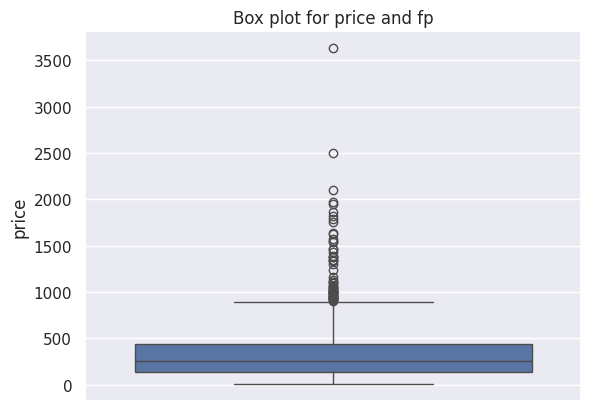

In [ ]:
sns.boxplot(y='price', data=X_test_falsePositives).set_title("Box plot for price and fp")
plt.show()

Plotting the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

[0.91484465 0.05178366 0.01265823 0.00690449 0.00345224 0.00345224
 0.00115075 0.0023015  0.0023015  0.00115075]
[  0.   17.9  35.8  53.7  71.6  89.5 107.4 125.3 143.2 161.1 179. ]


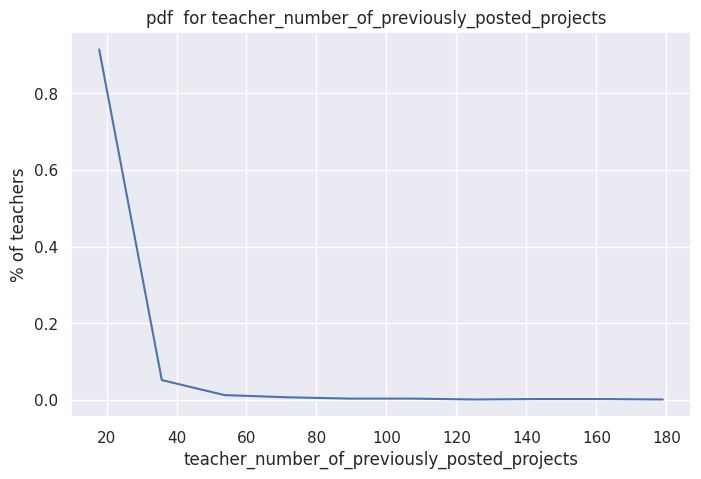

In [ ]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePositives['teacher_number_of_previously_posted_projects'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],pdf)



plt.title("pdf  for teacher_number_of_previously_posted_projects  ")
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.ylabel("% of teachers")


plt.show();

In [ ]:
#sns.FacetGrid(X_test_falsePositives, size=5) \
 #  .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
 #  .add_legend();
#plt.title('pdf of_number_of_previously_posted_projects of false positive data points')
#plt.show();

SET-2

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((train_tfidf_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_subject_ohe,X_train_subject_sub_ohe,X_train_price_norm,X_train_post_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm,X_train_com_norm)).tocsr()

X_te2 = hstack((test_tfidf_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_subject_ohe,X_test_subject_sub_ohe, X_test_price_norm,X_test_post_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm,X_test_com_norm)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)

print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 782) (33500,)
(16500, 782) (16500,)


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

DT = DecisionTreeClassifier(class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100,500]}
clf1 = GridSearchCV(DT, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf1.fit(X_tr2, y_train)

train_auc= clf1.cv_results_['mean_train_score']
train_auc_std= clf1.cv_results_['std_train_score']
cv_auc = clf1.cv_results_['mean_test_score']
cv_auc_std= clf1.cv_results_['std_test_score']
bestMaxDepth_2=clf1.best_params_['max_depth']
bestMinSampleSplit_2=clf1.best_params_['min_samples_split']
bestScore_2=clf1.best_score_
print("BEST MAX DEPTH: ",clf1.best_params_['max_depth']," BEST SCORE: ",clf1.best_score_,"BEST MIN SAMPLE SPLIT: ",clf1.best_params_['min_samples_split'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
BEST MAX DEPTH:  5  BEST SCORE:  0.6016359983786707 BEST MIN SAMPLE SPLIT:  500


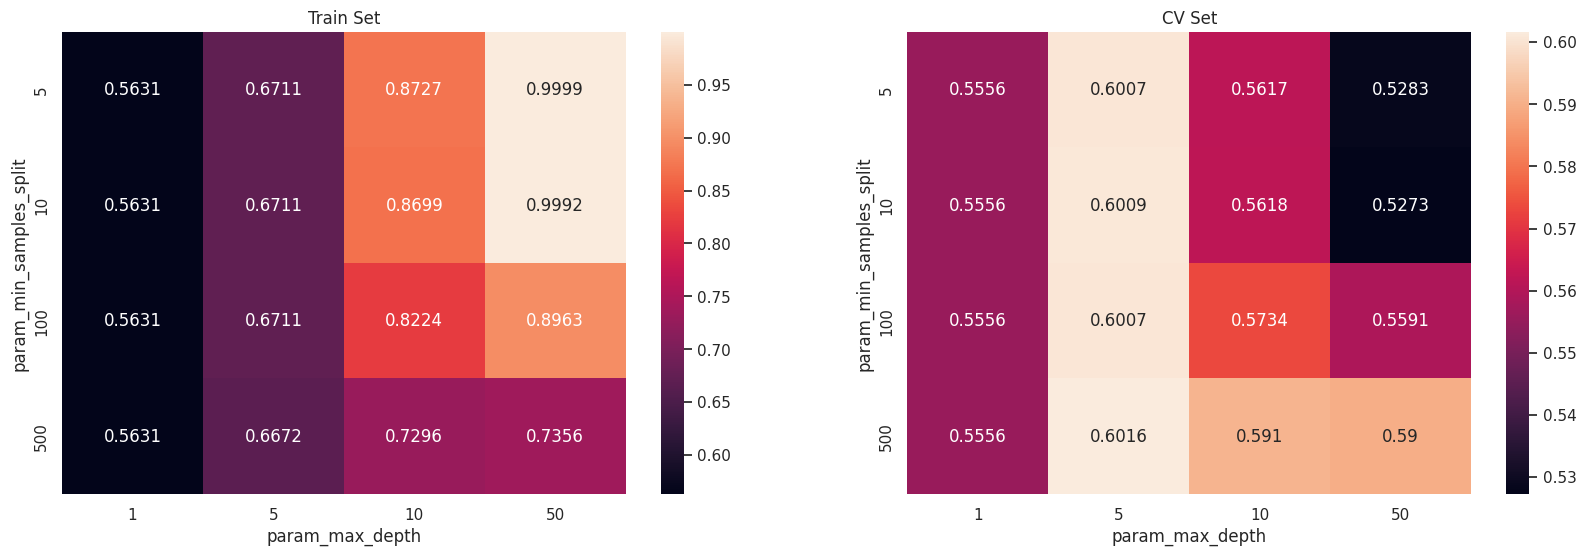

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_scores2 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

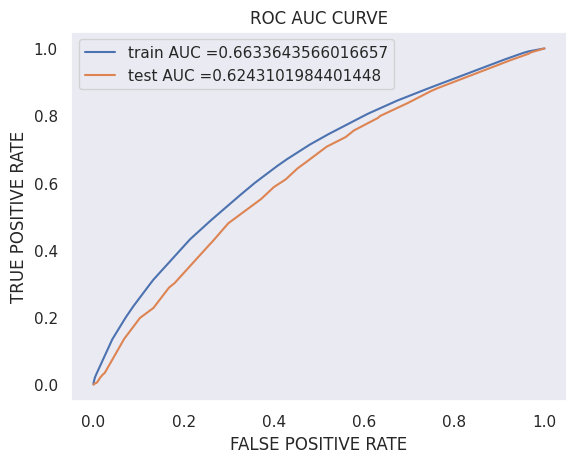

In [ ]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

clf1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=5,min_samples_split=100)
clf1.fit(X_tr2, y_train)
# for visulation
clf1.fit(X_tr2, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred2 = clf1.predict_proba(X_tr2) [:,1]
y_test_pred2 = clf1.predict_proba(X_te2) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC AUC CURVE")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions2 = []
    global predictions3
    for i in proba:
        if i>=threshould:
            predictions2.append(1)
        else:
            predictions2.append(0)
    predictions3=predictions2
    return predictions2

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t)))

the maximum value of tpr*(1-fpr) 0.3859716326843718 for threshold 0.505
Train confusion matrix
[[ 3222  1946]
 [10792 17540]]
Test confusion matrix
[[1461 1085]
 [5438 8516]]


the maximum value of tpr*(1-fpr) 0.3859716326843718 for threshold 0.505


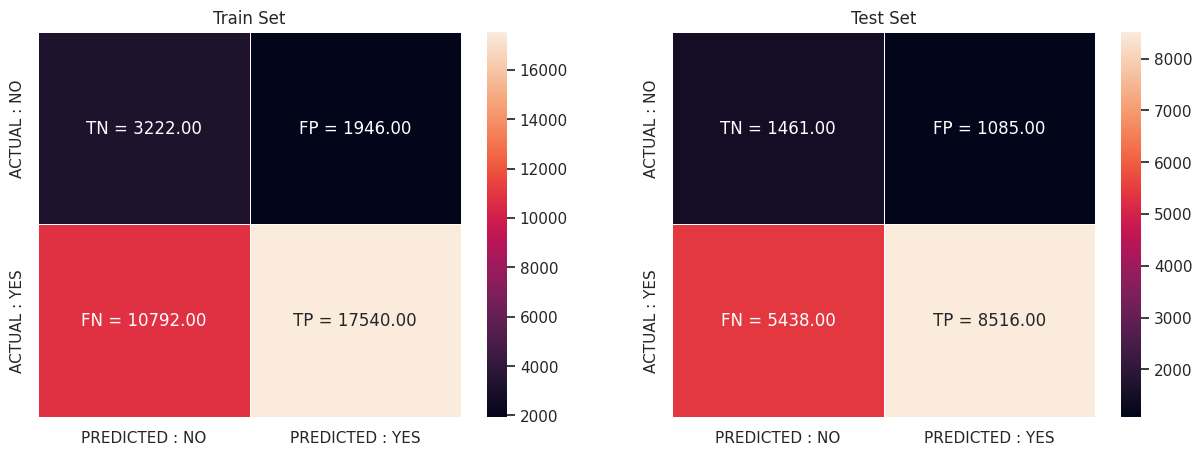

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
con_m_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t))
con_m_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [ ]:
false_positives1 = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions3[i] == 1) :
    false_positives1.append(i)
fp_essay2 = []
for i in false_positives1 :
  fp_essay2.append(X_test['essay'].values[i])

Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these false positive data points

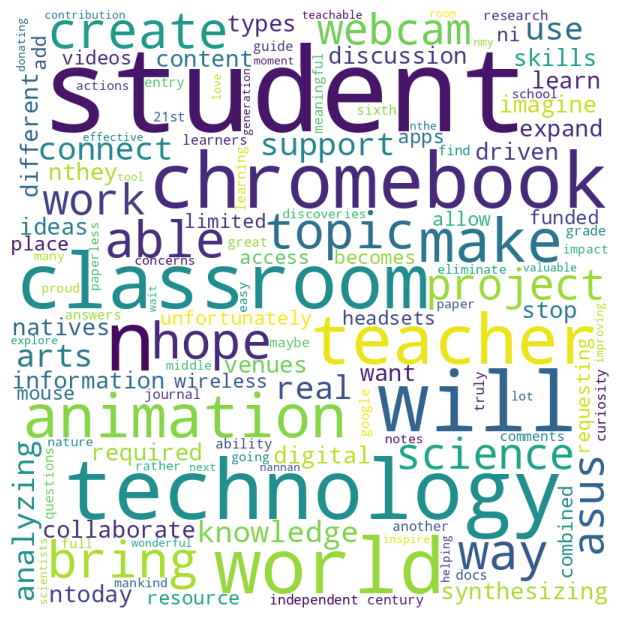

In [ ]:
#COPIED FROM:https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)

for val in fp_essay2 :
  val = str(val)
  tokens = val.split()

for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()

for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)


plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Creating Dataframe for Falsepositives

In [ ]:
cols = X_test.columns
X_test_falsePositives1 = pd.DataFrame(columns=cols)

In [ ]:
# Create a list to store the false positive DataFrames
fp_data_frames1 = []
for i in false_positives1 :
  # Filter the row from X_test and add it to the list
  fp_data_frames1.append(X_test.loc[[i]]) # Using .loc to get a DataFrame row by index

# Concatenate all collected DataFrames at once
# Check if the list is not empty to avoid errors with pd.concat on an empty list
if fp_data_frames1:
    X_test_falsePositives1 = pd.concat(fp_data_frames1)
else:
    # If no false positives, X_test_falsePositives1 remains an empty DataFrame as initialized
    # (X_test_falsePositives1 = pd.DataFrame(columns=cols) from previous cell)
    pass

In [ ]:
len(X_test_falsePositives1)

1085

Plotting the box plot with the price of these false positive data points

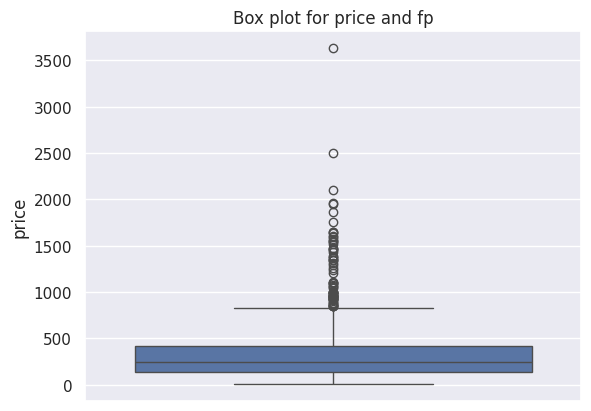

In [ ]:
sns.boxplot(y='price', data=X_test_falsePositives1).set_title("Box plot for price and fp")
plt.show()

Plotting the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

[9.35483871e-01 3.59447005e-02 9.21658986e-03 4.60829493e-03
 2.76497696e-03 2.76497696e-03 3.68663594e-03 4.60829493e-03
 0.00000000e+00 9.21658986e-04]
[  0.   21.1  42.2  63.3  84.4 105.5 126.6 147.7 168.8 189.9 211. ]


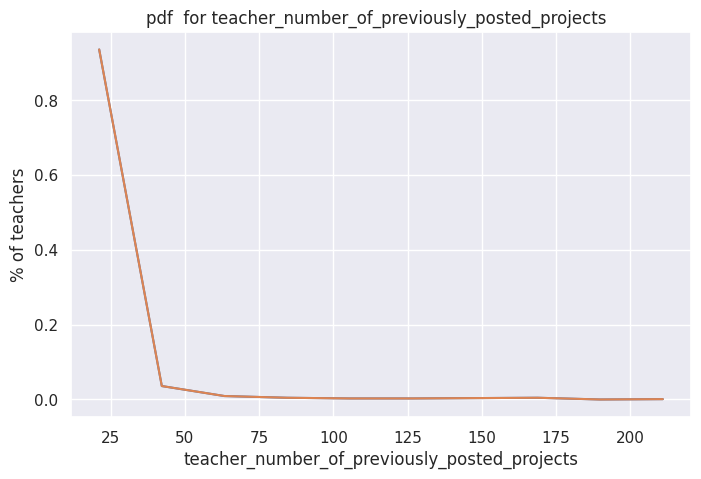

In [ ]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePositives1['teacher_number_of_previously_posted_projects'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],pdf)



plt.title("pdf  for teacher_number_of_previously_posted_projects  ")
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.ylabel("% of teachers")


plt.show();

In [ ]:
#sns.FacetGrid(X_test_falsePositives1, size=5) \
#   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
#  .add_legend();
#plt.title('pdf of_number_of_previously_posted_projects of false positive data points')
#plt.show();

# <font color='red'> <b>Task - 2</b></font>

In [ ]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


SELECTING ALL THE FEATURES BY KEEPING MAX_DEPTH DEFAULT NONE FOR SET-1 AND DOING HYPER PARAMETER TUNING

In [ ]:
DT5 = DecisionTreeClassifier(class_weight = 'balanced')
params = { 'min_samples_split': [5, 10, 100,500]}
clf5 = GridSearchCV(DT, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf5.fit(X_tr1, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Getting the feature importance using 'featureimportances'

In [ ]:
#https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
#https://stackoverflow.com/questions/51682470/how-to-get-feature-importance-in-decision-tree
def selectKImportance(model,X,k=5):
    model.fit(X_tr1,y_train)
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [ ]:
X_set5_train = selectKImportance(clf5, X_tr1,5000)
X_set5_test = selectKImportance(clf5, X_te1, 5000)
print(X_set5_train.shape)
print(X_set5_test.shape)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
(33500, 5000)
(16500, 5000)


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr3 = hstack((X_set5_train, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_subject_ohe,X_train_subject_sub_ohe,X_train_price_norm,X_train_post_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm,X_train_com_norm)).tocsr()

X_te3 = hstack((X_set5_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_subject_ohe,X_test_subject_sub_ohe, X_test_price_norm,X_test_post_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm,X_test_com_norm)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)

print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 5482) (33500,)
(16500, 5482) (16500,)


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

DT5 = DecisionTreeClassifier(class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100,500]}
clf3 = GridSearchCV(DT5, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf3.fit(X_tr3, y_train)

train_auc= clf3.cv_results_['mean_train_score']
train_auc_std= clf3.cv_results_['std_train_score']
cv_auc = clf3.cv_results_['mean_test_score']
cv_auc_std= clf3.cv_results_['std_test_score']
bestMaxDepth_3=clf3.best_params_['max_depth']
bestMinSampleSplit_3=clf3.best_params_['min_samples_split']
bestScore_3=clf3.best_score_
print("BEST MAX DEPTH: ",clf3.best_params_['max_depth']," BEST SCORE: ",clf3.best_score_,"BEST MIN SAMPLE SPLIT: ",clf3.best_params_['min_samples_split'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
BEST MAX DEPTH:  10  BEST SCORE:  0.6185653624446648 BEST MIN SAMPLE SPLIT:  500


In [ ]:
print(clf3.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)


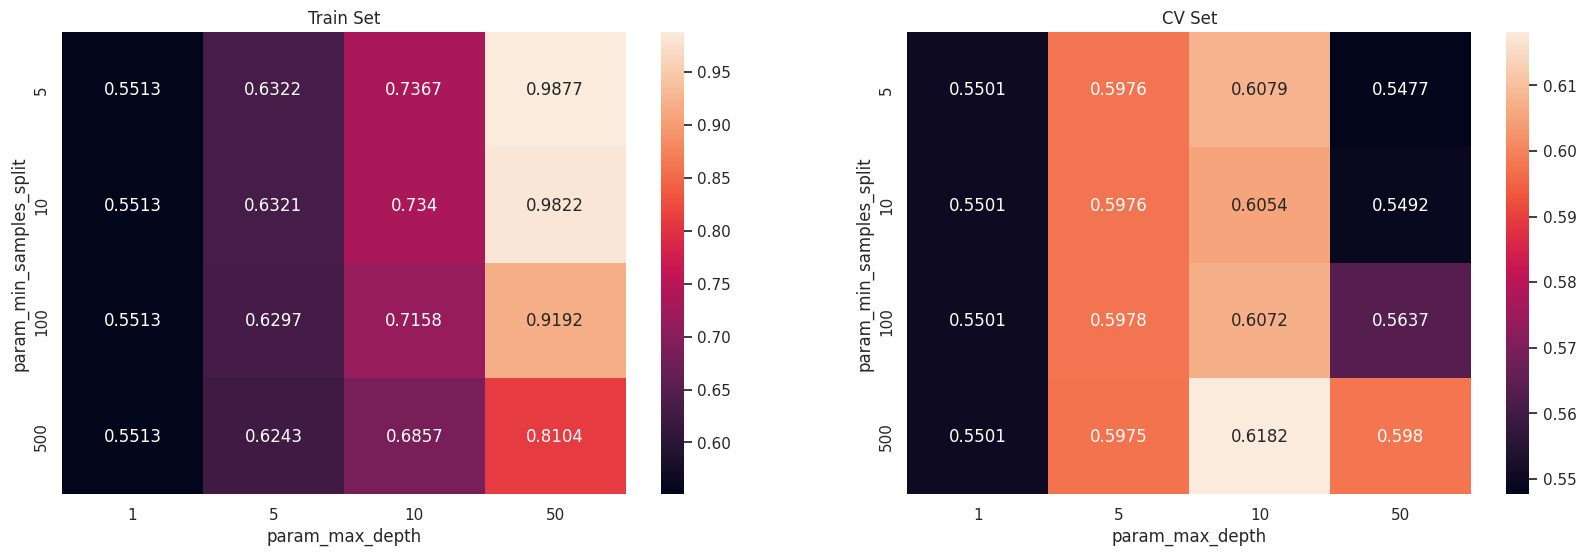

In [ ]:
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

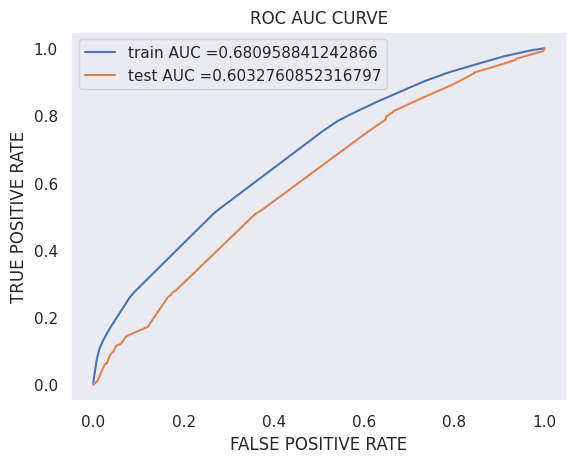

In [ ]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

clf3=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf3.fit(X_tr3, y_train)
# for visulation
clf3.fit(X_tr3, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred3 = clf3.predict_proba(X_tr3) [:,1]
y_test_pred3 = clf3.predict_proba(X_te3) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred3)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC AUC CURVE")
plt.grid()
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions5 = []
    global predictions6
    for i in proba:
        if i>=threshould:
            predictions5.append(1)
        else:
            predictions5.append(0)
    predictions6=predictions5
    return predictions5

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred3, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred3, best_t)))

the maximum value of tpr*(1-fpr) 0.37601680936870163 for threshold 0.528
Train confusion matrix
[[ 3741  1427]
 [13615 14717]]
Test confusion matrix
[[1601  945]
 [6735 7219]]


the maximum value of tpr*(1-fpr) 0.37601680936870163 for threshold 0.528


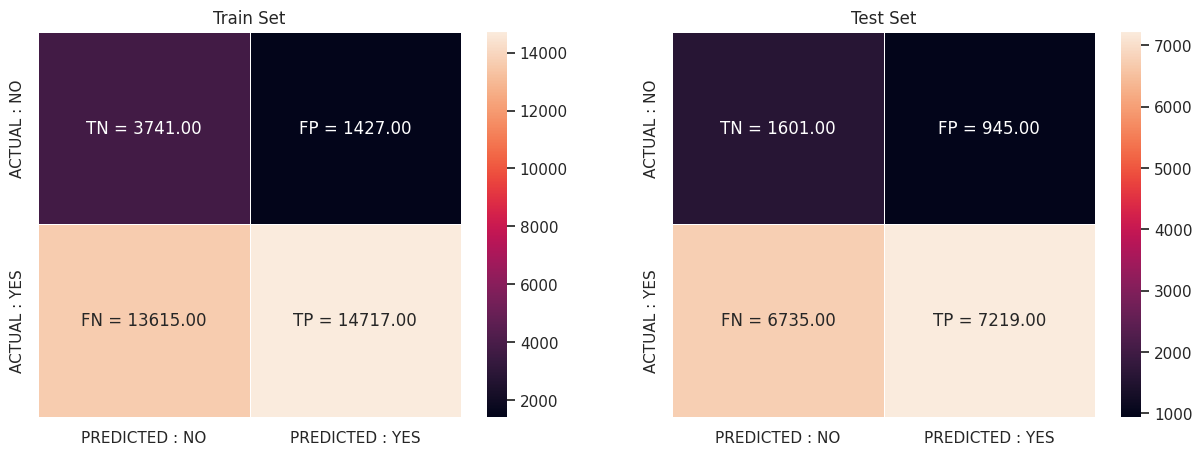

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
con_m_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred3, best_t))
con_m_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred3, best_t))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [ ]:
false_positives2 = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions6[i] == 1) :
    false_positives2.append(i)
fp_essay3 = []
for i in false_positives2 :
  fp_essay3.append(X_test['essay'].values[i])

Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these false positive data points

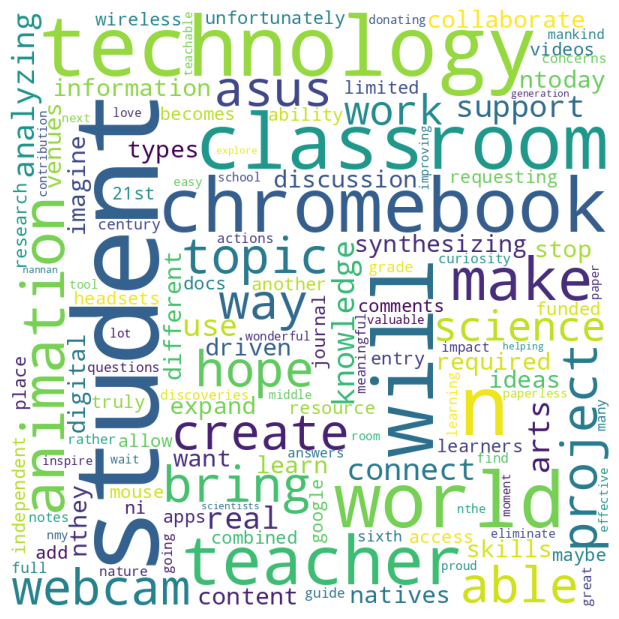

In [ ]:
#COPIED FROM:https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS

comment_words = ' '
stopwords = set(STOPWORDS)

for val in fp_essay3 :
  val = str(val)
  tokens = val.split()

for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()

for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)


plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Creating Dataframe with false positives

In [ ]:
cols = X_test.columns
X_test_falsePositives2 = pd.DataFrame(columns=cols)

In [ ]:
# Create a list to store the false positive DataFrames
fp_data_frames2 = []
for i in false_positives2:
  # Filter the row from X_test and add it to the list
  fp_data_frames2.append(X_test.loc[[i]]) # Using .loc to get a DataFrame row by index

# Concatenate all collected DataFrames at once
# Check if the list is not empty to avoid errors with pd.concat on an empty list
if fp_data_frames2:
    X_test_falsePositives2 = pd.concat(fp_data_frames2)
else:
    # If no false positives, X_test_falsePositives2 remains an empty DataFrame as initialized
    # (X_test_falsePositives2 = pd.DataFrame(columns=cols) from previous cell)
    pass

In [ ]:
len(X_test_falsePositives2)

945

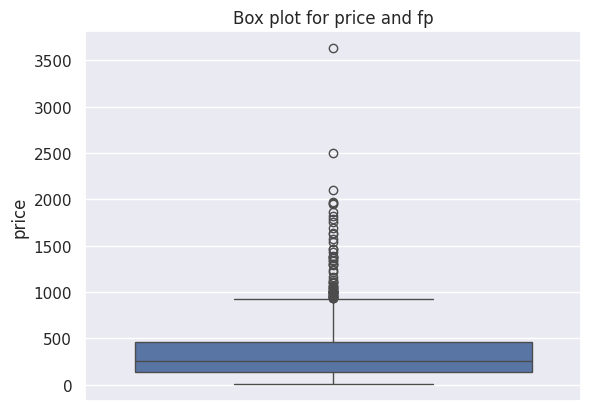

In [ ]:
sns.boxplot(y='price', data=X_test_falsePositives2).set_title("Box plot for price and fp")
plt.show()

Plotting the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

[0.90687831 0.05608466 0.01481481 0.00740741 0.0042328  0.0042328
 0.0010582  0.0021164  0.0021164  0.0010582 ]
[  0.   17.9  35.8  53.7  71.6  89.5 107.4 125.3 143.2 161.1 179. ]


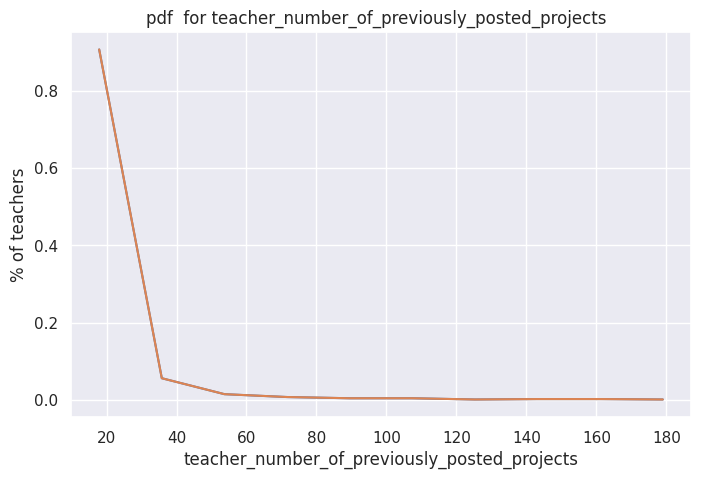

In [ ]:
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePositives2['teacher_number_of_previously_posted_projects'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],pdf)



plt.title("pdf  for teacher_number_of_previously_posted_projects  ")
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.ylabel("% of teachers")


plt.show();

In [ ]:
# Tabulate your results

SUMMARY

In [ ]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","MAX_DEPTH", "MIN_SAMPLE_SPLIT", "Test AUC"]

x.add_row(["TFIDF","10","500", 0.614])
x.add_row(["TFIDF_W2V", "5", "100",0.6215])
x.add_row(["FEATURE_IMPORTANCE", "10", "500",0.6028])
print(x)

+--------------------+-----------+------------------+----------+
|     Vectorizer     | MAX_DEPTH | MIN_SAMPLE_SPLIT | Test AUC |
+--------------------+-----------+------------------+----------+
|       TFIDF        |     10    |       500        |  0.614   |
|     TFIDF_W2V      |     5     |       100        |  0.6215  |
| FEATURE_IMPORTANCE |     10    |       500        |  0.6028  |
+--------------------+-----------+------------------+----------+
